In [1]:
#1. Show how actors interact with one another and the connections between them. 
    # Actors are nodes and number of times they act with each other are edges
#2. See the interactions between IMDB / Critic reviews and the people in the movies.
    # Actors are nodes and ratings are edges 
#3. See which actors / movies bridge groups of movies.
    # Movies are nodes and number of common actors are edges!

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the csv file
movies = pd.read_csv("C:/Users/Andy Dotter/Documents/05_Spring_2019/Spring_2/Social Network Analytics/movie_metadata.csv")

In [4]:
# Print the column names
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# How many movies do we have?
movies.shape

(5043, 28)

In [6]:
# Preview of dataset
movies.head()

# Drop duplicated columns
movies = movies.drop_duplicates()

# Drop columns that we do not need
movies = movies.loc[:,['movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score', 'gross']]

# Preview the new dataframe
movies.head()

,movie_title,actor_1_name,actor_2_name,actor_3_name,imdb_score,gross
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,7.1,309404152.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,6.8,200074175.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,Rob Walker,NaN,7.1,NaN


In [7]:
# Summary statistics of the score:
movies['imdb_score'].describe()

count    4998.000000
mean        6.441056
std         1.124107
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

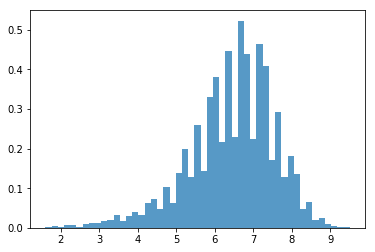

In [8]:
plt.hist(movies['imdb_score'], 'auto', density = 100, alpha=0.75)
plt.show()

In [9]:
# Sort the dataset by score:
movies_score = movies.sort_values(by = "imdb_score", ascending = False)

In [11]:
# Give all movies that have a score greater than 7.5 (This should be about 25% of data)
high_score = movies[(movies['imdb_score'] >= 7.5)]

In [12]:
# Now create a dataframe for the top 250 movies
Top_250 = movies_score.head(250)

In [13]:
def gephi(movies):
    movies = movies.loc[:,['actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score']]
    movies = movies.replace(' ', '_', regex=True) # replace whitespace by underscore, since Gephi doesn't recognize spaces
    movies = movies.reset_index(drop=True) # reset indices
    return(movies)

In [14]:
actors = gephi(movies)
high_score = gephi(high_score)
Top_250 = gephi(Top_250)

In [15]:
#### This should be the data to answer Question 1
# Print out the actor CSV. This is every movie
actors.to_csv("actors.csv", sep = ";", index = False, header = False)
# Print out the high scores i.e. top 25%
high_score.to_csv("high_scores.csv", sep = ";", index = False, header = False)
# Print out the top 250 movies.
Top_250.to_csv("Top_250.csv", sep = ";", index = False, header = False)

In [16]:
## Now lets Look at Dollar Amounts!#######
movies['gross'].describe()

count    4.124000e+03
mean     4.832565e+07
std      6.796483e+07
min      1.620000e+02
25%      5.304835e+06
50%      2.544575e+07
75%      6.231942e+07
max      7.605058e+08
Name: gross, dtype: float64

In [17]:
# Sort the dataset by gross amount:
movies_dollar = movies.sort_values(by = "gross", ascending = False)

In [18]:
# Get top 25% of movies by gross dollar amount
movies_dollar_gross25pct = movies_dollar[movies_dollar['gross'] >= 62319420]

In [19]:
# Get to 250 movies by dollar amount
movies_dollar_top250 = movies_dollar.head(250)

In [20]:
def gephi_gross(movies):
    movies = movies.loc[:,['actor_1_name', 'actor_2_name', 'actor_3_name', 'gross']]
    movies = movies.replace(' ', '_', regex=True) # replace whitespace by underscore, since Gephi doesn't recognize spaces
    movies = movies.reset_index(drop=True) # reset indices
    return(movies)

In [21]:
actors_money = gephi_gross(movies_dollar)
movies_dollar_gross25pct_money = gephi_gross(movies_dollar_gross25pct)
movies_dollar_top250_money = gephi_gross(movies_dollar_top250)

In [22]:
#### This does not answer any questions but could if we want it to.
# Print out the actor CSV. This is every movie
actors_money.to_csv("actors_money.csv", sep = ";", index = False, header = False)
# Print out the top 25% by gross
movies_dollar_gross25pct_money.to_csv("gross_top25pct_money.csv",sep = ";", index = False, header = False)
# Print out the top 250 by gross
movies_dollar_top250_money.to_csv("gross_top250_money.csv",sep = ";", index = False, header = False)